# Fruit and Vegetable Classifier

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.metrics import precision_recall_fscore_support

## Declare CNN Model Parameters

In [2]:
batch_size = 32
epochs_size = 20
activation_function = 'relu'
dropout_rate = 0.25
optimizer_type = 'adam'
loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
rescaling_factor = 1./255
conv1_filters = 32
conv2_filters = 64
conv3_filters = 128
dense_neurons = 256
padding = 'same'
kernel_size = 3

## Load Data and Split into Training, Validation, and Testing

In [3]:
data_train='data/train'
data_test='data/test'
data_val='data/validation'
image_width = 200
image_height = 200

data_train = tf.keras.utils.image_dataset_from_directory(
    data_train,
    shuffle=True,
    image_size=(image_width, image_height),
    batch_size=batch_size,
    validation_split=False
)

data_val = tf.keras.utils.image_dataset_from_directory(
    data_val,
    image_size=(image_height, image_width),
    batch_size=batch_size,
    shuffle=False,
    validation_split=False
)

data_test = tf.keras.utils.image_dataset_from_directory(
    data_test,
    image_size=(image_height, image_width),
    shuffle=False,
    batch_size=batch_size,
    validation_split=False
)

Found 3115 files belonging to 36 classes.
Found 351 files belonging to 36 classes.
Found 359 files belonging to 36 classes.


## Display an Image from each Label

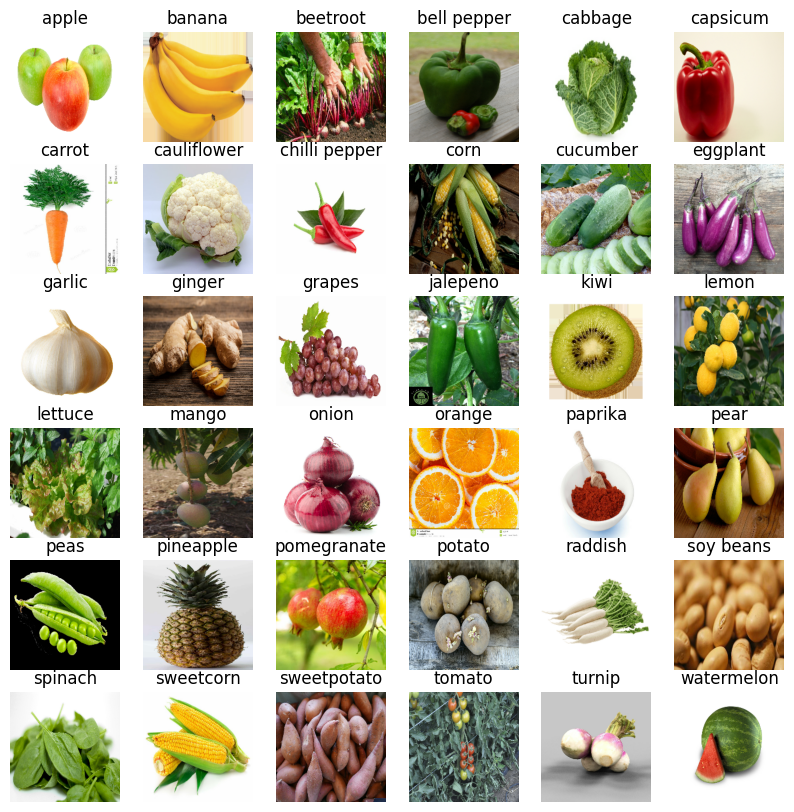

In [4]:
one_image_per_label = {}
for images, labels in data_train:
    for image, label in zip(images, labels):
        label_name = data_train.class_names[label]
        if label_name not in one_image_per_label:
            one_image_per_label[label_name] = image
            break
sorted_labels = sorted(one_image_per_label.items())

plt.figure(figsize=(10, 10))
for i, (label, image) in enumerate(sorted_labels):
    plt.subplot(6, 6, i+1)
    plt.imshow(image.numpy().astype("uint8"))
    plt.title(label)
    plt.axis("off")
plt.show()

## Build and Train CNN Model

In [5]:
model = Sequential()
model.add(layers.Rescaling(rescaling_factor))
model.add(layers.Conv2D(conv1_filters, kernel_size, padding=padding, activation=activation_function))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(conv2_filters, kernel_size, padding=padding, activation=activation_function))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(conv3_filters, kernel_size, padding=padding, activation=activation_function))
model.add(layers.MaxPooling2D())
model.add(layers.Flatten())
model.add(layers.Dropout(dropout_rate))
model.add(layers.Dense(dense_neurons, activation=activation_function))
model.add(layers.Dense(len(data_train.class_names)))
model.compile(optimizer=optimizer_type, loss=loss_function, metrics=['accuracy'])
train_results = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 85s 797ms/step - accuracy: 0.0535 - loss: 3.9732 - val_accuracy: 0.3732 - val_loss: 2.3274
Epoch 2/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 75s 736ms/step - accuracy: 0.2560 - loss: 2.5719 - val_accuracy: 0.4615 - val_loss: 1.7950
Epoch 3/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 79s 783ms/step - accuracy: 0.3650 - loss: 2.1544 - val_accuracy: 0.6353 - val_loss: 1.2813
Epoch 4/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 89s 883ms/step - accuracy: 0.4740 - loss: 1.7767 - val_accuracy: 0.7721 - val_loss: 0.9187
Epoch 5/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 80s 791ms/step - accuracy: 0.6033 - loss: 1.3523 - val_accuracy: 0.8661 - val_loss: 0.6292
Epoch 6/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 77s 760ms/step - accuracy: 0.7632 - loss: 0.8627 - val_accuracy: 0.9031 - val_loss: 0.3918
Epoch 7/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 79s 778ms/step - accuracy: 0.8380 - loss: 0.5721 - val_accuracy: 0.9202 - val_loss: 0.4319
Epoch 8/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 80s 794ms/step - accuracy: 0.8952 - loss: 0.3732 - val_accu

## Plot Train and Validation Metrics

Text(0.5, 1.0, 'Accuracy %')

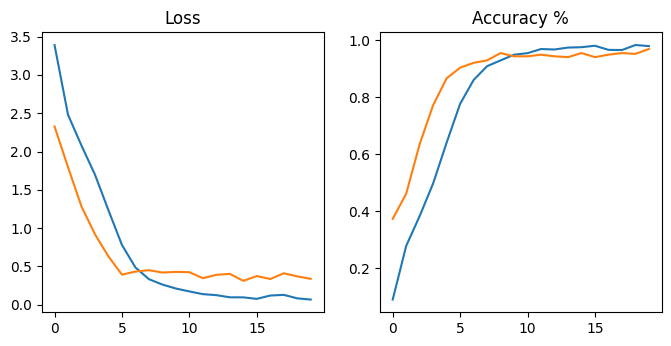

In [6]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.plot(epochs_range,train_results.history['loss'])
plt.plot(epochs_range, train_results.history['val_loss'])
plt.title('Loss')
plt.subplot(2,2,2)
plt.plot(epochs_range,train_results.history['accuracy'])
plt.plot(epochs_range, train_results.history['val_accuracy'])
plt.title('Accuracy %')

## Evaluate Model

In [7]:
test_loss, test_accuracy = model.evaluate(data_test)
print("Models accuracy % on test dataset: {:.2f}%".format(test_accuracy * 100))
print("Models loss on test dataset: {:.2f}".format(test_loss))

12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 389ms/step - accuracy: 0.9544 - loss: 0.5036
Models accuracy % on test dataset: 96.94%
Models loss on test dataset: 0.31


In [8]:
predictions = model.predict(data_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.concatenate([y for x, y in data_test], axis=0)
precision, recall, f1_score, _ = precision_recall_fscore_support(true_labels, predicted_labels, average='weighted')
print("Models precision on test dataset:: {:.2f}".format(precision))
print("Models recall on test dataset:: {:.2f}".format(recall))
print("Models F1 score on test dataset:: {:.2f}".format(f1_score))

12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 350ms/step
Models precision on test dataset:: 0.97
Models recall on test dataset:: 0.97
Models F1 score on test dataset:: 0.97


## Save Model

In [9]:
model.save('fruit_vegetable_classifier_model.keras')